In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#evaluar modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_excel('cosofinal.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 294 non-null    int64  
 1   Edad                       294 non-null    int64  
 2   Estatura                   294 non-null    float64
 3   Área de residencia         294 non-null    int64  
 4   Tipo colegio               294 non-null    int64  
 5   Género                     294 non-null    int64  
 6   Estrato                    294 non-null    int64  
 7   Nota Matematicas           294 non-null    int64  
 8   Nota Lecto Escritura       294 non-null    int64  
 9   Apoyo económico de padres  294 non-null    int64  
 10  Último grado cursado       294 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.4 KB


In [3]:
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
matriz_correlacion=df.corr().abs()

<function matplotlib.pyplot.show(close=None, block=None)>

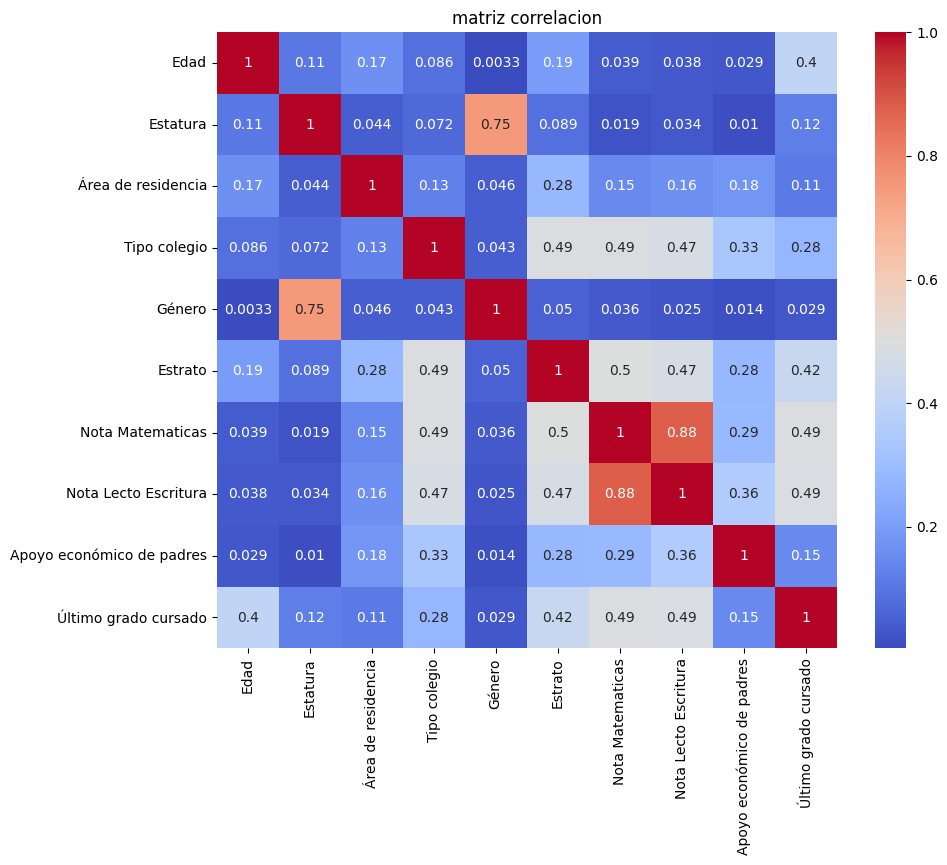

In [5]:
np.fill_diagonal=(matriz_correlacion.values, 0)

mas_correlacionados=matriz_correlacion.unstack().sort_values(ascending=False).drop_duplicates()

plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('matriz correlacion')
plt.show

In [6]:
for (var1,var2), correlacion in mas_correlacionados.items():
    print(f'Las variables {var1} y {var2} tienen una correlación de: {correlacion}.')

Las variables Edad y Edad tienen una correlación de: 1.0.
Las variables Nota Matematicas y Nota Lecto Escritura tienen una correlación de: 0.8791409294144626.
Las variables Estatura y Género tienen una correlación de: 0.748623045517334.
Las variables Estrato y Nota Matematicas tienen una correlación de: 0.49980986674334094.
Las variables Tipo colegio y Nota Matematicas tienen una correlación de: 0.4919918470036402.
Las variables Estrato y Tipo colegio tienen una correlación de: 0.49183326850347103.
Las variables Nota Matematicas y Último grado cursado tienen una correlación de: 0.4902080821294931.
Las variables Último grado cursado y Nota Lecto Escritura tienen una correlación de: 0.48879918670351447.
Las variables Tipo colegio y Nota Lecto Escritura tienen una correlación de: 0.47477323528228726.
Las variables Nota Lecto Escritura y Estrato tienen una correlación de: 0.47449196012504585.
Las variables Último grado cursado y Estrato tienen una correlación de: 0.4248114755826642.
Las va

In [7]:
df=df.drop(['Edad', 'Área de residencia', 'Género', 'Estatura'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Tipo colegio               294 non-null    int64
 1   Estrato                    294 non-null    int64
 2   Nota Matematicas           294 non-null    int64
 3   Nota Lecto Escritura       294 non-null    int64
 4   Apoyo económico de padres  294 non-null    int64
 5   Último grado cursado       294 non-null    int64
dtypes: int64(6)
memory usage: 13.9 KB


In [8]:
df.columns=['tipo colegio', 'estrato', 'matematicas', 'lecto_escritura', 'apoyo_economico', 'ultimo_grado']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tipo colegio     294 non-null    int64
 1   estrato          294 non-null    int64
 2   matematicas      294 non-null    int64
 3   lecto_escritura  294 non-null    int64
 4   apoyo_economico  294 non-null    int64
 5   ultimo_grado     294 non-null    int64
dtypes: int64(6)
memory usage: 13.9 KB


In [9]:
df['promedio']=(df['matematicas'] + df['lecto_escritura'])/2
df

,tipo colegio,estrato,matematicas,lecto_escritura,apoyo_economico,ultimo_grado,promedio
0,0,3,1,3,0,11,2.0
1,1,4,5,4,1,11,4.5
2,0,1,3,2,1,9,2.5
3,0,2,2,2,0,10,2.0
4,1,4,4,5,1,10,4.5
...,...,...,...,...,...,...,...
289,0,4,4,4,1,11,4.0
290,1,5,5,5,1,11,5.0
291,0,2,3,3,0,10,3.0
292,1,3,3,3,1,10,3.0


In [11]:
# Crear la columna 'Riesgo' y asignar valores según el rango del promedio
# <=3 -> 0: Desercion - <=4 -> 1: Alerta - 2: Buen estudiante

df['riesgo']= np.where(df['promedio'] <= 3, 0,np.where(df['promedio'] <= 4, 1, 2))

# Entrenamiento del modelo

In [12]:
variables=['tipo colegio', 'estrato', 'matematicas', 'lecto_escritura', 'apoyo_economico', 'ultimo_grado']

X=df[variables]
y=df['riesgo']

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Escalar caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred=model.predict(X_test_scaled)

Evaluación del modelo

In [23]:
prediccion = accuracy_score(y_test, y_pred)

print('Precición del modelo: %.2f' %prediccion)

Precición del modelo: 1.00


In [24]:
#Matriz de confusion


conf_matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion:')
print(conf_matriz)

Matriz de confusion:
[[30  0  0]
 [ 0 17  0]
 [ 0  0 12]]


In [26]:
#predicción
tipo_colegio = 1
estrato = 2
matematicas = 0
lecto_escritura = 0
apoyo_economico = 1
ultimo_grado = 11

In [28]:
# Realizar una predicción de probabilidades para la predicción futura
pred_probabilities = model.predict_proba([[tipo_colegio, estrato, matematicas, lecto_escritura,
                                                    apoyo_economico, ultimo_grado]])

# Obtener los nombres de las clases (Deserción, Alerta, Buen estudiante)
class_names = model.classes_

# Imprimir las probabilidades de cada clase para la predicción futura
for i, class_name in enumerate(class_names):
    prob = pred_probabilities[0, i] * 100
    print(f"Probabilidad de {class_name}: {round(prob, 2)}%")

Probabilidad de 0: 0.03%
Probabilidad de 1: 98.66%
Probabilidad de 2: 1.31%


In [29]:
import pickle

#Guardar el modelo en un archivo
with open('modelo_regresion_pkl', 'wb')GeoJSON